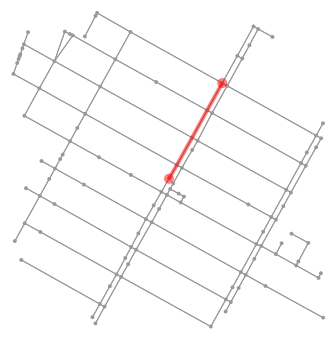

Die kürzeste Wegstrecke [in m] beträgt:
277.888


In [88]:
#Nötige Packages
import osmnx as ox
import networkx as nx
import geopandas 
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

#Beispiel für die Bestimmung der kürzesten Wegstrecke zwischen zwei Bänken

#Im Radius von 400m um diesen Punkt wird ein Ausschnitt der Karte von New York betrachtet 
startpoint = ox.geocode('2394 Adam Clayton Powell Jr Blvd, New York City')

#Die Lokalisation der Bänke in Koordinaten
G = ox.graph_from_point(startpoint, network_type = 'walk', distance = 400, simplify = False)
bank1 = ox.geocode('2450 Adam Clayton Powell Jr Blvd, New York City')
bank2 = ox.geocode('2394 Adam Clayton Powell Jr Blvd, New York City')

#Die Lokalisation der Bänke in Nodes
bank1n = ox.get_nearest_node(G,bank1)
bank2n = ox.get_nearest_node(G,bank2)

#Die Distanz der jeweils nächsten Nodes zueinander wird nun geplottet und in Metern berechnet
route = nx.shortest_path(G, bank1n, bank2n, weight = 'length')
ox.plot_graph_route(G, route)
routem = nx.shortest_path_length(G, bank1n, bank2n, weight = 'length')
print("Die kürzeste Wegstrecke [in m] beträgt:")
print(routem)


In [91]:
# Vorbereitung des Datensatzes
import osmnx as ox
df = pd.read_excel('citybenchlocationsv03.xlsx')
df['Address'] = df['Address'] + ', New York City'
addressborough = df[['Address', 'Borough']]

#Proof of Concept mit fünf Bänken in Manhattan
addressmanhattan = addressborough[addressborough['Borough'] == 'Manhattan']
addressmanhattanh = addressmanhattan.head(10) #Eingeschränkt auf 5 Einträge

#Hinzufügen einer Tabellenspalte für die Geocodes der Adressen
addressmanhattang = []
for i in addressmanhattanh['Address']:
    addressmanhattang.append(ox.geocode(i))

addressmanhattanh.insert(2, 'Geocode', addressmanhattang, True)

#Graph, der die Nodes enthält, die die Grundlage für die Distanzberechnung sind (noch suboptimal)
G = ox.graph_from_point((40.74619633333333, -73.983977), network_type = 'walk', distance = 5000, simplify = False)

#Hinzufügen einer Tabellenspalte für die Node-Identifier
addressmanhattann = []
for i in addressmanhattanh['Geocode']:
    addressmanhattann.append(ox.get_nearest_node(G, i))    
    
addressmanhattanh.insert(3, 'Node', addressmanhattann, True)

#Ausgabe der Tabelle mit den neuen Spalten "Geocode" und "Node"
print(addressmanhattanh)

#Schleife für die Distanzberechnung (noch suboptimal)
distance = []
for i in addressmanhattanh['Node']:
    for j in addressmanhattanh['Node']:
        distance.append(nx.shortest_path_length(G, i, j, weight = 'length'))

distancewd = dict.fromkeys(distance)
print("Die kürzeste Wegstrecke [in m] von einer Bank zu einer anderen ist:")
print(sorted(distancewd)[1])

        


        









                                 Address    Borough  \
0   540 West 145th Street, New York City  Manhattan   
56  145 & 147 Madison Ave, New York City  Manhattan   
57     165 Madison Avenue, New York City  Manhattan   
58     191 Madison Avenue, New York City  Manhattan   
59     199 Madison Avenue, New York City  Manhattan   
60     227 Madison Avenue, New York City  Manhattan   
88   175 East 96th Street, New York City  Manhattan   
91  201 West 106th Street, New York City  Manhattan   
94      1020 Third Avenue, New York City  Manhattan   
99   209 West 96th Street, New York City  Manhattan   

                                     Geocode        Node  
0                   (40.8260052, -73.949854)  6254630456  
56           (40.74619633333333, -73.983977)  3252586222  
57  (40.746812750000004, -73.98327882871746)    42445903  
58   (40.74802628571428, -73.98264385714285)  4960503208  
59                 (40.7482878, -73.9824103)  4960503208  
60                    (40.80383, -73.942